In [1]:
# First let's import the packages we will use in this project
# You can do this all now or as you need them
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [2]:
# First let's import the packages we will use in this project
# You can do this all now or as you need them
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None





In [3]:
# Now we need to read in the data
df = pd.read_csv('movies.csv')

In [4]:
# We need to see if we have any missing data
# Let's loop through the data and see if there is anything missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [5]:
# Data Types for our columns

print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


In [6]:
df['budget'] = df['budget'].fillna(0).astype('int64')


In [7]:
df['gross'] = df['gross'].fillna(0).astype('int64')

In [8]:
print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object


<Axes: >

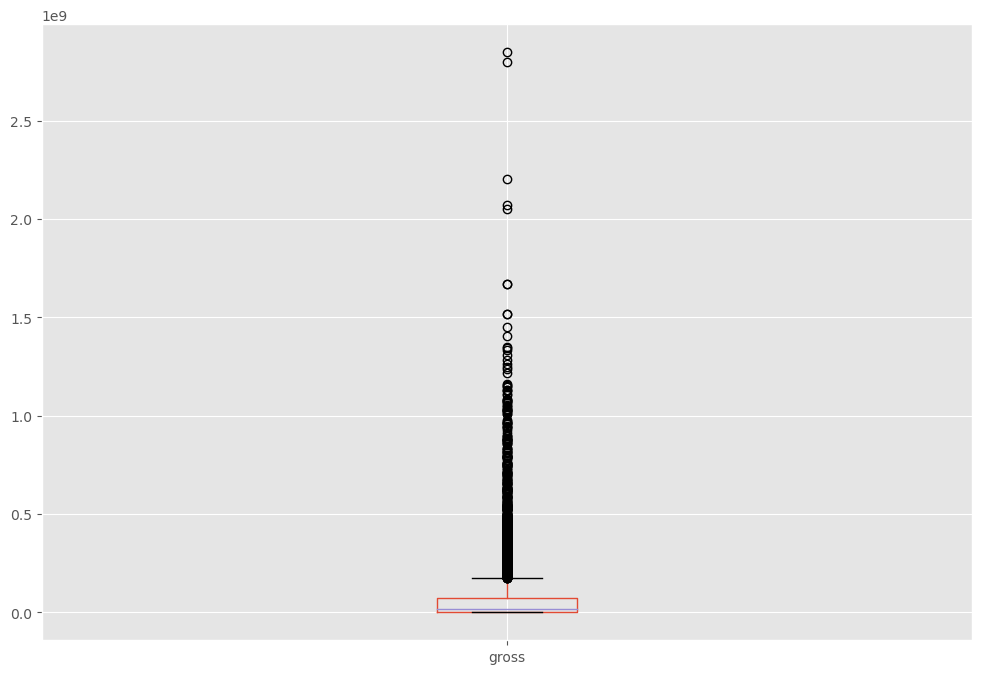

In [9]:
# Are there any Outliers?

df.boxplot(column=['gross'])

In [10]:
df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000,0,NaN,120.0


In [11]:
# Order our Data a little bit to see

df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,Mortal Passions,R,Crime,1989,"January 26, 1990 (United States)",4.5,274.0,Andrew Lane,Alan Moskowitz,Zach Galligan,United States,0,0,Gibraltar Entertainment,92.0
1614,Edge of Sanity,R,Horror,1989,"April 14, 1989 (United States)",5.2,1300.0,Gérard Kikoïne,J.P. Félix,Anthony Perkins,United Kingdom,0,0,Allied Vision,85.0
1606,"I, Madman",R,Fantasy,1989,"April 7, 1989 (United States)",6.0,2900.0,Tibor Takács,David Chaskin,Jenny Wright,Canada,0,0,Trans World Entertainment (TWE),89.0
1601,My Twentieth Century,NaN,Comedy,1989,"January 13, 1990 (Japan)",7.1,1500.0,Ildikó Enyedi,Ildikó Enyedi,Dorota Segda,Hungary,0,0,Budapest Stúdió Vállalat,104.0


<Axes: xlabel='gross', ylabel='budget'>

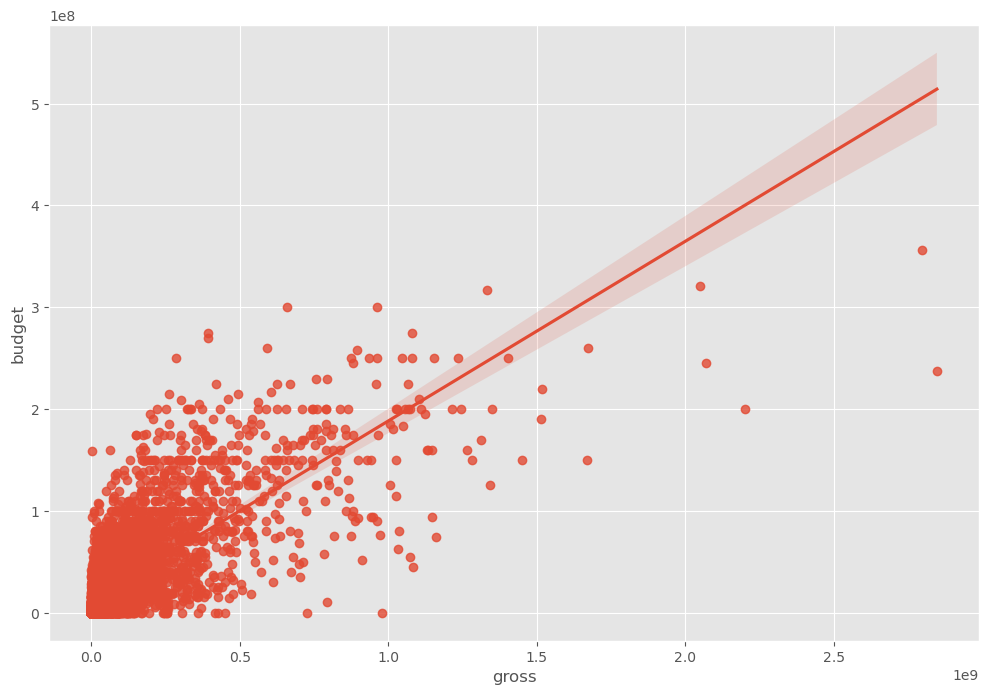

In [14]:
sns.regplot(x="gross", y="budget", data=df)

<Axes: xlabel='score', ylabel='gross'>

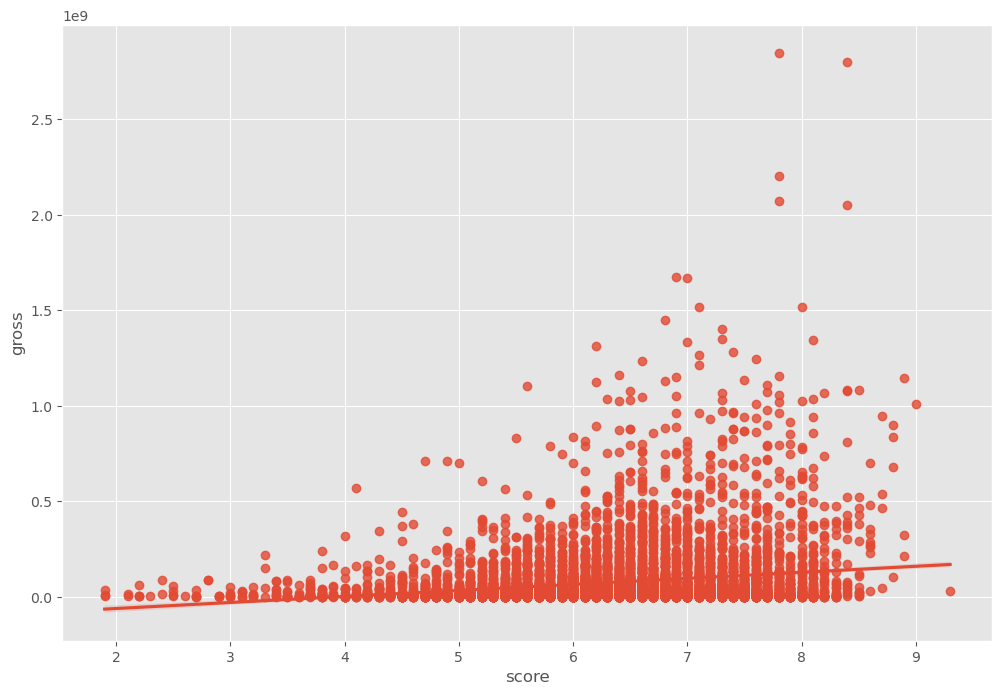

In [12]:
sns.regplot(x="score", y="gross", data=df)

In [13]:
# Correlation Matrix between all numeric columns

df.corr(method='pearson', numeric_only=True)


,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.309212,0.261900,0.120811
score,0.097995,1.000000,0.409182,0.055665,0.186392,0.399451
votes,0.222945,0.409182,1.000000,0.486862,0.632834,0.309212
budget,0.309212,0.055665,0.486862,1.000000,0.750157,0.269510
gross,0.261900,0.186392,0.632834,0.750157,1.000000,0.245235
runtime,0.120811,0.399451,0.309212,0.269510,0.245235,1.000000


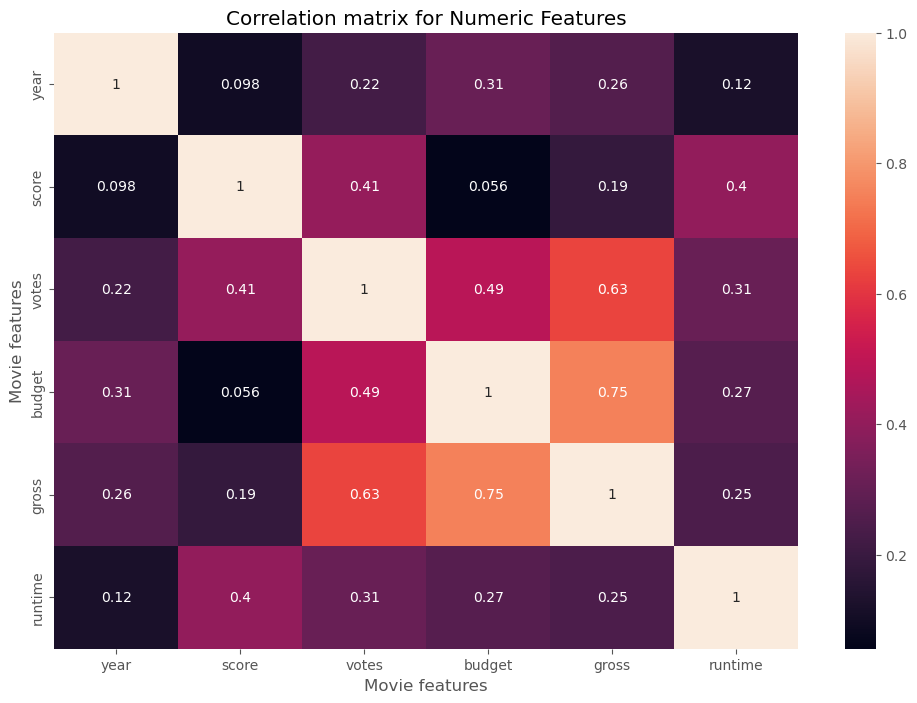

In [15]:
# MAKING A CORRELATION HEATMAP

correlation_matrix = df.corr(method='pearson', numeric_only=True)

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [16]:
# Using factorize - this assigns a random numeric value for each unique categorical value

df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,0.143938,0.036367,0.965761,0.959015,-0.046733,0.287776,0.745905,0.805211,0.731565,0.142828,0.275691,0.947540,0.591667,0.048955
rating,0.143938,1.000000,-0.086723,0.156713,0.146606,0.012595,0.099972,0.085520,0.103623,0.093116,0.000494,0.193229,0.158575,-0.028035,0.032741
genre,0.036367,-0.086723,1.000000,0.037184,0.035940,-0.002437,0.023285,0.047288,0.033688,0.038649,-0.015795,0.069445,0.038635,0.009566,0.001462
year,0.965761,0.156713,0.037184,1.000000,0.993190,-0.044981,0.312401,0.770497,0.824770,0.756400,0.140216,0.298022,0.981090,0.601571,0.050647
released,0.959015,0.146606,0.035940,0.993190,1.000000,-0.045761,0.299905,0.770876,0.819617,0.754468,0.148468,0.284017,0.976647,0.607954,0.048235
score,-0.046733,0.012595,-0.002437,-0.044981,-0.045761,1.000000,-0.009749,-0.022687,-0.034685,-0.009896,0.023097,-0.011749,-0.047004,-0.028432,0.026436
votes,0.287776,0.099972,0.023285,0.312401,0.299905,-0.009749,1.000000,0.192220,0.224122,0.179601,-0.045914,0.395374,0.286308,0.008900,0.106024
director,0.745905,0.085520,0.047288,0.770497,0.770876,-0.022687,0.192220,1.000000,0.748340,0.682385,0.155471,0.108033,0.751149,0.552258,-0.011070
writer,0.805211,0.103623,0.033688,0.824770,0.819617,-0.034685,0.224122,0.748340,1.000000,0.675685,0.157202,0.186680,0.805784,0.546151,0.032264
star,0.731565,0.093116,0.038649,0.756400,0.754468,-0.009896,0.179601,0.682385,0.675685,1.000000,0.182045,0.110870,0.735911,0.527116,0.035392


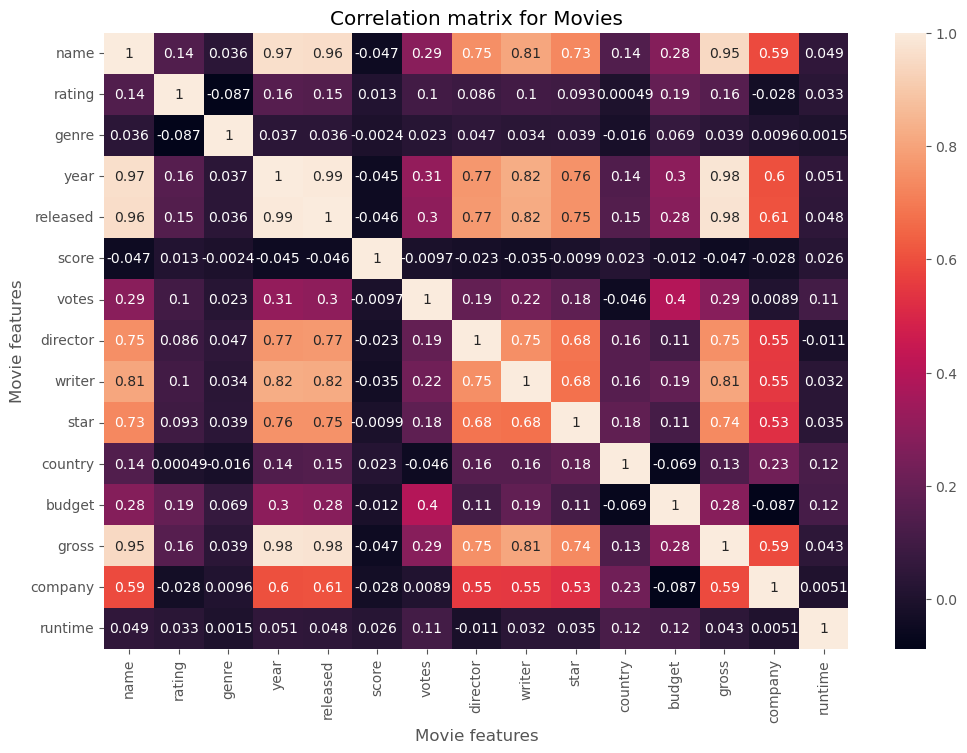

In [17]:
correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [25]:
correlation_mat = df.apply(lambda x: x.factorize()[0]).corr()

corr_pairs = correlation_mat.unstack()

print(corr_pairs)



name     name        1.000000
         rating      0.143938
         genre       0.036367
         year        0.965761
         released    0.959015
                       ...   
runtime  country     0.124154
         budget      0.115359
         gross       0.043017
         company     0.005137
         runtime     1.000000
Length: 225, dtype: float64


In [26]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

budget   company   -0.087285
company  budget    -0.087285
genre    rating    -0.086723
rating   genre     -0.086723
budget   country   -0.068884
                      ...   
year     year       1.000000
genre    genre      1.000000
rating   rating     1.000000
company  company    1.000000
runtime  runtime    1.000000
Length: 225, dtype: float64


In [27]:
# We can now take a look at the ones that have a high correlation (> 0.5)

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

star      company    0.527116
company   star       0.527116
          writer     0.546151
writer    company    0.546151
director  company    0.552258
                       ...   
year      year       1.000000
genre     genre      1.000000
rating    rating     1.000000
company   company    1.000000
runtime   runtime    1.000000
Length: 71, dtype: float64
